In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# **Question 2**

In [2]:
import urllib
url= 'https://github.com/arujakhanna/Data-Science/blob/master/summer-products-with-rating-and-performance_2020-08.csv%20-%20Sheet1.csv?raw=true'

# i have uploaded this csv file directly on my github repo so that anyone can access it everytime doesn't need to have the file stored locally
data=pd.read_csv(url)
data
df=data

In [14]:
df=data
for col in df.columns.values:
  if ( col== "rating_three_count" or col== "rating_four_count" or col== "rating_five_count" or col== "rating_count " or col== "rating_two_count" or col== "rating_one_count" ) :
    df[col].fillna(0, inplace = True) #so that no null values, assumed a null means not rated so zero
    df[col]=df[col].astype(int)

df['has_urgency_banner'].fillna(0, inplace = True)
df['urgency_text'].fillna("none", inplace = True)
df['product_variation_inventory'].fillna(0, inplace = True)
df['product_color'].fillna("none", inplace = True)
df['uses_ad_boosts'].fillna(0,inplace= True)

df=df.drop(["tags","product_id","merchant_id","merchant_title","product_url","product_picture","merchant_profile_picture","merchant_has_profile_picture","merchant_info_subtitle"], axis=1)
#df    

df= df.drop(["title",'badges_count','badge_local_product','badge_product_quality','badge_fast_shipping','theme','crawl_month'],axis=1)
#df.info() #further dropping the redundant columns
df

title_orig  ...  merchant_rating
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  ...         4.128521
1      Women's Casual Summer Sleeveless Sexy Mini Dress  ...         3.899673
2     2020 New Arrival Women Spring and Summer Beach...  ...         3.989831
3     Hot Summer Cool T Shirt for Women Fashion Tops...  ...         4.020435
4     Women Summer Shorts Lace Up Elastic Waistband ...  ...         4.001588
...                                                 ...  ...              ...
1568  New Fashion Women Bohemia Dandelion Print Tee ...  ...         4.224605
1569  10 Color Women Summer Shorts Lace Up Elastic W...  ...         3.696054
1570  New Men Siwmwear Beach-Shorts Men Summer Quick...  ...         3.961905
1571  Fashion Women Summer Sleeveless Dresses V Neck...  ...         3.774194
1572  Fashion Women Yoga Pants Slim Fit Fitness Runn...  ...         4.235939

[1573 rows x 27 columns]

In [14]:
df['product_variation_size_id'].unique()
df["product_variation_size_id"].replace({"Size-XS": "XS","SIZE XS": "XS","SIZE XXS": "XXS", "Size--S": "S","L.": "L","X   L": "XL","Size XS": "XS","Size XXS": "XXS", "Size-XXS": "XXS",  "Size S": "S", "Size S.": "S", "XS.": "XS", "XXL": "XXL", "XXXL": "XXL", "XXXXL": "XXL", "XXXXXL": "XXL"}, inplace=True)
df["product_variation_size_id"].replace({"Size-5XL": "XXL","SIZE-4XL": "XXL","SIZE XXS": "XXS","M.": "M", "S.": "S","s": "S", "Size XS": "XS",  "Size M": "M", "size S": "S", "SIZE-XXS": "XXS", "SIZE-XXS": "XXS", "Size-L": "L", "Size4XL": "XXL", "SIZE S": "S"}, inplace=True)
df=df[(df['product_variation_size_id'] =='XS') | (df['product_variation_size_id'] =='XXS') | ( df['product_variation_size_id'] =='S' ) | ( df['product_variation_size_id'] =='L' ) | ( df['product_variation_size_id'] =='XXL' ) | ( df['product_variation_size_id'] =='M' ) ]

df['product_variation_size_id'].unique()

array(['S', 'M', 'XS', 'L', 'XXS', 'XXL'], dtype=object)

In [7]:
df.sort_values("units_sold", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')

data=df
datagrouped= data.groupby('product_color').mean() #to find the mean of the units sold to find the top 6 countries
datasorted=datagrouped.sort_values(by='units_sold', ascending=False)
datasorted.head(15)  #to determine the top 6 

price  retail_price  ...  merchant_rating_count  merchant_rating
product_color                            ...                                        
light green      8.000000      7.000000  ...          108048.000000         4.052504
wine red         3.000000      3.000000  ...          151249.000000         4.049157
ivory            5.880000      9.000000  ...           12304.000000         4.319002
denimblue       22.000000     19.000000  ...            4107.000000         4.096908
none            11.086957     35.304348  ...           60442.913043         4.199390
floral           9.540000     35.000000  ...           40267.800000         4.088258
coolblack        7.000000      7.000000  ...           15740.000000         4.083675
black & yellow   7.000000     40.500000  ...            3417.500000         4.111699
black & white   10.666667      9.666667  ...           10831.333333         4.055956
whitestripe      6.000000     31.000000  ...           11596.000000         4.280442
army green       6.000000    142.000000  ...           31559.000000         4.123420
navy blue        8.000000      7.000000  ...           36076.500000         4.255857
Blue             9.000000     48.000000  ...           42919.000000         4.105967
pink & grey      8.000000      7.000000  ...           10258.000000         4.243712
White            9.303333     27.000000  ...           31990.333333         4.099925

[15 rows x 19 columns]

Topmost colours sold are light green, wine red, ivory, denim blue, floral and coolblack.

# **(a)**

In [19]:
df2=df
df2["product_color"].replace({'yellow': "LIGHT COLOURS",'pink': "LIGHT COLOURS",'green': "LIGHT COLOURS",'lightblue': "LIGHT COLOURS",'black': "DARK COLOURS", 'brown': "DARK COLOURS",'darkblue': "DARK COLOURS",'orange': "LIGHT COLOURS",}, inplace=True)
df2=df[(df['product_color'] =='LIGHT COLOURS') | (df['product_color'] =='DARK COLOURS')]
df2.groupby(['product_color','product_variation_size_id'])['price','units_sold'].sum()

price  units_sold
product_color product_variation_size_id                     
DARK COLOURS  L                           109.77       71300
              M                           575.49      402310
              S                          1277.60      691670
              XS                          354.28      222010
              XXL                          79.02       27610
              XXS                          80.86       26810
LIGHT COLOURS L                           175.69       81250
              M                           311.48      183900
              S                          1167.88      502752
              XS                          737.24      168834
              XXL                           5.65          10
              XXS                          94.07       19057

In [21]:
import warnings
warnings.filterwarnings('ignore')

cnt=['LIGHT COLOURS','DARK COLOURS']
for countri in cnt:
  df2=df.loc[df['product_color']==countri]
  sum=0.0
  df3=df2.groupby(['product_variation_size_id'])['price','units_sold'].sum()
  df3=df3.reset_index()
  df3.columns=['size','price','total sold']
  df3['avg_price/unit100k']=(df3['price']*100000)/df3['total sold']
  
  x=df3['avg_price/unit100k'].mean()
  
  df3['Xi-mean_squared']=(df3['avg_price/unit100k']-x)*(df3['avg_price/unit100k']-x)
  var=df3['Xi-mean_squared'].mean()
  print("\nThe data for",countri,"is below and the sum of error squared is in the last column of the following:\n",df3)
  
  print("\n The average(mean) of the price of ",countri," sized products is ",x,"\n")
  print("\n The variance of the price of ",countri," sized products is ",var,"\n")


The data for LIGHT COLOURS is below and the sum of error squared is in the last column of the following:
   size    price  total sold  avg_price/unit100k  Xi-mean_squared
0    L   175.69       81250          216.233846     8.946257e+07
1    M   311.48      183900          169.374660     9.035120e+07
2    S  1167.88      502752          232.297435     8.915895e+07
3   XS   737.24      168834          436.665601     8.534127e+07
4  XXL     5.65          10        56500.000000     2.192609e+09
5  XXS    94.07       19057          493.624390     8.429214e+07

 The average(mean) of the price of  LIGHT COLOURS  sized products is  9674.699321955346 


 The variance of the price of  LIGHT COLOURS  sized products is  438535817.8356015 


The data for DARK COLOURS is below and the sum of error squared is in the last column of the following:
   size    price  total sold  avg_price/unit100k  Xi-mean_squared
0    L   109.77       71300          153.955119      2590.234900
1    M   575.49      4023

# **(b)**

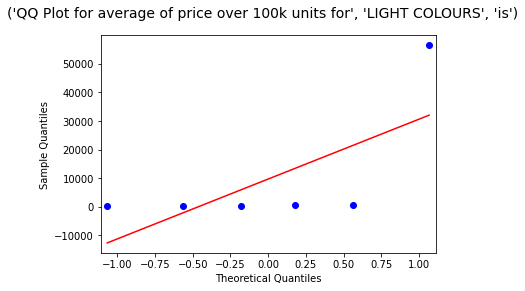

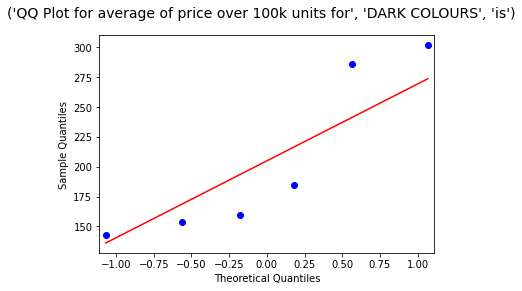

In [25]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
cnt=['LIGHT COLOURS','DARK COLOURS']
for countri in cnt:
  df2=df.loc[df['product_color']==countri]
  sum=0.0
  df3=df2.groupby(['product_variation_size_id'])['price','units_sold'].sum()
  df3=df3.reset_index()
  df3.columns=['size','price','total sold']
  df3['avg_price/unit100k']=(df3['price']*100000)/df3['total sold']
  
  fig= sm.qqplot(df3['avg_price/unit100k'],line='s')
  t="QQ Plot for average of price over 100k units for",countri,"is"
  fig.suptitle (t,fontsize=14)
  plt.show()


As we can see from the above QQ plots, it doesnt follow a normal distribution AT ALL so there is no point of doing a t-test or any such paired tests. it is senseless to do so.

Now, we perform tests on the price of all the products as that seems to make more sense:

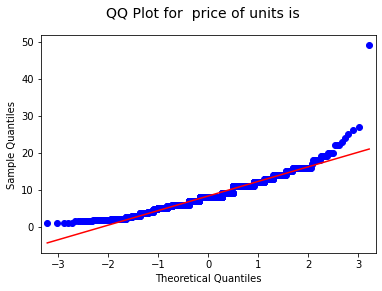

In [9]:
import statsmodels.api as sm
fig= sm.qqplot(df['price'],line='s')
t="QQ Plot for  price of units is"
fig.suptitle (t,fontsize=14)
plt.show()

fig= sm.qqplot(df['retail_price'],line='s')
t="QQ Plot for  retail price of units is"
fig.suptitle (t,fontsize=14)
plt.show()

These distributions are better, so performing tests on these. Though we see that the price is more normally distributed than the retail price.

# **(c)**



Have taken the log likelihood of the price of an item.

In [38]:
import math
import statsmodels.api as sm

n=len(df)
x_bar=df['price'].mean()
x=x_bar
sigma=math.sqrt(((df['price']-x)*(df['price']-x)).mean())
  
logL = -sum/(2*sigma*sigma) - n*np.log(2*math.pi)/2 -n*np.log(sigma)
print(" The log likelihood of price is \n",logL)


 The log likelihood of price is 
 -3586.7243140380756


# **(d)**

In [29]:
len(df)

1573

In [31]:
from scipy import stats 
import math
from __future__ import division
import warnings
warnings.filterwarnings('ignore')

n=len(df)
con_coef=.95
alpha= 1-con_coef
x_bar=df['price'].mean()
x=x_bar
sigma=math.sqrt(((df['price']-x)*(df['price']-x)).mean())
z_critical= stats.norm.ppf(q= 0.975)
z_interval= stats.norm.interval(alpha=con_coef)
z_interval
standard_error= sigma/ math.sqrt(n)
CI_lower= x_bar-z_critical*standard_error
CI_upper= x_bar+z_critical*standard_error
print('\n the 95% Confidence interval for price is:')
print(CI_lower,"to", CI_upper,"\n")




 the 95% Confidence interval for price is:
8.131121268367524 to 8.519622533285345 



# **(e),(f)**

In [5]:
import scipy.stats
from scipy import stats
a=df['price']
b=df['retail_price']
scipy.stats.wilcoxon(a-b)

WilcoxonResult(statistic=219631.0, pvalue=5.6222894347757865e-68)

Null hypothesis (H0): The mean of sample 1 is equal to the mean of sample 2

Alternative hypothesis (HA): u1 ≠ u2,implies the mean of sample 1 is not equal to the mean of sample 2

The assumptions we have taken are:

The distribution of the two groups should follow the normal distribution

From the Wilcoxon test result we arrive at:

if p-value is less than 0.05, we can reject the null hypothesis, since it is much lesser than 0.05, we accept the null hypothesis, hence, price and retail price have the same mean. SO, rounding it off doesnt change the mean.


For two discrete variables, test an appropriate hypothesis with chi-squared test.

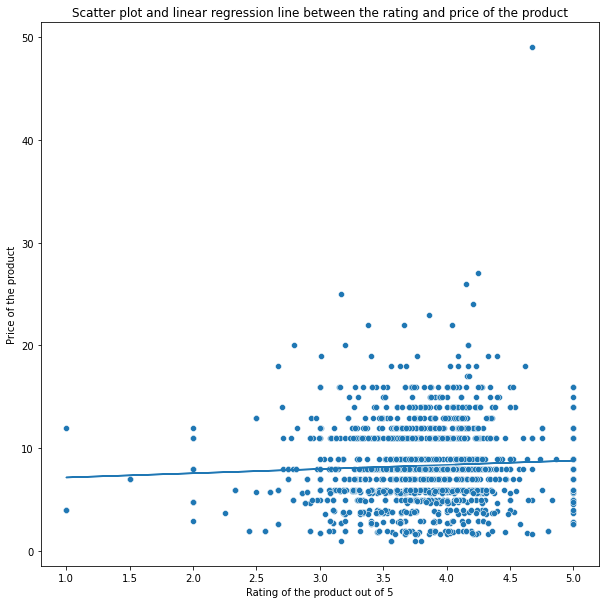

In [37]:
df=df[(df['units_sold'] < 100000)]
f, ax2 = plt.subplots(figsize=(10,10)) # to make it big for better information inference

ax2= sb.scatterplot(x="rating", y="price", data=df)
plt.xlabel('Rating of the product out of 5')
plt.ylabel('Price of the product')
x=df['rating']
m, b = np.polyfit(df['rating'], df['price'], 1)
plt.plot(x, m*x + b)
plt.title("Scatter plot and linear regression line between the rating and price of the product")
plt.show()


The scatter plot and the line of best fit is as shown above.

# **(h)**

In [18]:
df2= df.groupby(['uses_ad_boosts','has_urgency_banner']).sum()

df2

price  ...  merchant_rating
uses_ad_boosts has_urgency_banner           ...                 
0              0.0                 5423.13  ...      2544.170444
               1.0                 2227.57  ...      1056.281320
1              0.0                 3794.95  ...      1891.251819
               1.0                 1650.16  ...       851.175290

[4 rows x 17 columns]

 The table of uses_ad_boosts vs has_urgency_banner is:
 
   _ | _  _ 0_ _  _ | _ _ _ 1 _ _ _|

 0   |  2915317 | 1072118 |

 1   |       2018780    | 819040 |





In [22]:
from scipy.stats import chi2_contingency 
  
# defining the table 
data = [[2915317,1072118], [2018780,819040]] 
stat, p, dof, expected = chi2_contingency(data) 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.0
Dependent (reject H0)


So, the fact that the product uses ad boost and has urgency banner are related.